### Exercício 8
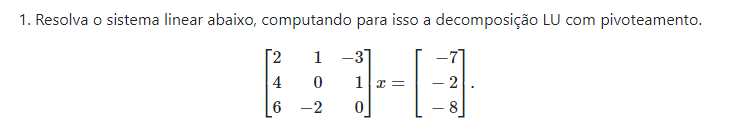

In [1]:
import numpy as np

In [2]:
def decomposicaoLU(A):
    n,c = A.shape
    L = np.identity(n, dtype=float)
    P = np.identity(n, dtype=float)
    for j in range(n):
        if A[j][j]==0:
            print("Não existe decomposição pois o pivo é nulo")
            return [],[]
        novaLinhaPivo = j
        for h in range(j,n):
            if A[j][h] > A[j][j]:
                novaLinhaPivo = h
                
        if h != novaLinhaPivo:
            print("h = ",h,"nova= ", novaLinhaPivo)
            A[j],A[h] = A[h].copy(),A[j].copy()
            P[j],P[h] = P[h].copy(),P[j].copy()
            
        for i in range(j+1,n):
            L[i][j] = A[i][j]/A[j][j]
            A[i][:] = A[i][:] - L[i][j]*A[j][:]
    return L,A,P

def triangularInferior(k,n,x,a,b):
    x[0] = b[0]/a[0][0]
    print(x[0])
    for k in range(1,k):
        s=0
        for j in range(0,k):
            s= s + a[k][j]*x[j]
            print("k=",k,"j=",j,"a[k][j]",a[k][j],"x[j]",x[j])
        x[k] = (b[k]-s)/a[k][k]    
        print("k=",k,"xk = ",x[k],"bk= ",b[k],"s= ",s,"akk= ",a[k][k])
    return x

def triangularSuperior(k,n,x,a,b):
    x[n-1] = b[n-1]/a[n-1][n-1]
    print(x[n-1],n-1)
    k = n-2
    while k >= 0:
        s=0
        for j in range(k+1,n):
            s= s + a[k][j]*x[j]
            print("k=",k,"j=",j,"a[k][j]",a[k][j],"x[j]",x[j],"n-1 = ",n-1)
        x[k] = (b[k]-s)/a[k][k]    
        print("k=",k,"xk = ",x[k],"bk= ",b[k],"s= ",s,"akk= ",a[k][k])
        k= k-1
    return x

In [3]:
A = np.array([
    [2,1,-3],
    [4,0,1],
    [6,-2,0]
])
b = np.array([-7,-2,-8])

In [4]:
print(A)
L,U,P = decomposicaoLU(A)
print("L= ",L,"\n")
print("U= ",U,"\n")
print("P= ",P,"\n")

[[ 2  1 -3]
 [ 4  0  1]
 [ 6 -2  0]]
h =  2 nova=  0
h =  2 nova=  1
L=  [[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 1.         1.        ]] 

U=  [[ 6 -2  0]
 [ 0  1 -3]
 [ 0  0  4]] 

P=  [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]] 



In [5]:
Pb = P.dot(b)
print(Pb)

[-8. -7. -2.]


In [6]:
k,n = L.shape
y = np.zeros(n)
print(y)
y = triangularInferior(k,n,y,L,Pb)
print(y)

[0. 0. 0.]
-8.0
k= 1 j= 0 a[k][j] 0.6666666666666666 x[j] -8.0
k= 1 xk =  -1.666666666666667 bk=  -7.0 s=  -5.333333333333333 akk=  1.0
k= 2 j= 0 a[k][j] 0.3333333333333333 x[j] -8.0
k= 2 j= 1 a[k][j] 1.0 x[j] -1.666666666666667
k= 2 xk =  2.333333333333334 bk=  -2.0 s=  -4.333333333333334 akk=  1.0
[-8.         -1.66666667  2.33333333]


In [7]:
k,n = U.shape
x = np.zeros(n)
print(x)
x = triangularSuperior(k,n,x,U,y)
print(x)

[0. 0. 0.]
0.5833333333333335 2
k= 1 j= 2 a[k][j] -3 x[j] 0.5833333333333335 n-1 =  2
k= 1 xk =  0.08333333333333348 bk=  -1.666666666666667 s=  -1.7500000000000004 akk=  1
k= 0 j= 1 a[k][j] -2 x[j] 0.08333333333333348 n-1 =  2
k= 0 j= 2 a[k][j] 0 x[j] 0.5833333333333335 n-1 =  2
k= 0 xk =  -1.3055555555555556 bk=  -8.0 s=  -0.16666666666666696 akk=  6
[-1.30555556  0.08333333  0.58333333]


#### Resposta [-1.30555556  0.08333333  0.58333333]